In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Odds Analysis

In [2]:
"""
# We will use glob to read odds files eg 2023-03-20-eurovision-odds.csv
import glob
path = 'data/odds/'
all_files = glob.glob(path + "/*.csv")
all_files.sort()

# Read all files into a list of dataframes
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate all dataframes into one
odds = pd.concat(li, axis=0, ignore_index=True)
odds.head()
"""

'\n# We will use glob to read odds files eg 2023-03-20-eurovision-odds.csv\nimport glob\npath = \'data/odds/\'\nall_files = glob.glob(path + "/*.csv")\nall_files.sort()\n\n# Read all files into a list of dataframes\nli = []\nfor filename in all_files:\n    df = pd.read_csv(filename, index_col=None, header=0)\n    li.append(df)\n\n# Concatenate all dataframes into one\nodds = pd.concat(li, axis=0, ignore_index=True)\nodds.head()\n'

In [3]:
# List all files
# all_files

In [4]:
eurovision_odds = pd.read_csv('data/odds/all/eurovision-odds.csv')
pd.set_option('display.max_columns', None)
eurovision_odds.head()

,date,position,country,song,winning chance,BET365,UNIBET,COOL BET,BETFAIR SPORT,SKY BET,BETSSON,LAD BROKES,COMEON,* SMARKETS,888 SPORT,BOYLE SPORTS,BET FRED,10BET,BETWAY,WILLIAM HILL,BETFAIR* EXCHANGE,BWIN,BET STARS
0,2023-03-20,1,Sweden,Loreen - Tattoo,40%,1.8,1.73,1.85,1.83,1.83,1.85,1.73,1.8,1.96,1.83,1.8,1.8,1.8,1.91,1.83,2.04,NaN,NaN
1,2023-03-20,2,Finland,Käärijä - Cha Cha Cha,14%,5.5,4.50,4.75,6.00,6.00,4.50,5.50,4.0,6.40,5.00,4.5,5.5,4.0,4.00,5.50,7.00,NaN,NaN
2,2023-03-20,3,Ukraine,Tvorchi - Heart of Steel,12%,6.5,7.00,6.00,6.00,6.00,7.00,6.00,6.0,7.00,5.50,5.0,6.0,6.0,7.50,5.00,8.00,NaN,NaN
3,2023-03-20,4,Norway,Alessandra - Queen of Kings,5%,15.0,13.00,15.00,15.00,15.00,13.00,15.00,15.0,17.00,13.00,15.0,17.0,15.0,19.00,13.00,20.00,NaN,NaN
4,2023-03-20,5,Israel,Noa Kirel - Unicorn,4%,21.0,21.00,21.00,23.00,26.00,25.00,21.00,17.0,16.00,21.00,17.0,23.0,17.0,23.00,13.00,20.00,NaN,NaN


In [5]:
eurovision_odds.columns

Index(['date', 'position', 'country', 'song', 'winning chance', 'BET365',
       'UNIBET', 'COOL BET', 'BETFAIR SPORT', 'SKY BET', ' BETSSON ',
       'LAD BROKES', 'COMEON', ' * SMARKETS', '888 SPORT', 'BOYLE SPORTS',
       'BET FRED', '10BET', 'BETWAY', ' WILLIAM  HILL', 'BETFAIR*  EXCHANGE ',
       'BWIN', 'BET STARS'],
      dtype='object')

In [6]:
eurovision_odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 2003 non-null   object 
 1   position             2003 non-null   int64  
 2   country              2003 non-null   object 
 3   song                 2003 non-null   object 
 4   winning chance       2003 non-null   object 
 5   BET365               2003 non-null   float64
 6   UNIBET               2001 non-null   float64
 7   COOL BET             2003 non-null   float64
 8   BETFAIR SPORT        2003 non-null   float64
 9   SKY BET              2003 non-null   float64
 10   BETSSON             2003 non-null   float64
 11  LAD BROKES           2003 non-null   float64
 12  COMEON               2003 non-null   float64
 13   * SMARKETS          1913 non-null   float64
 14  888 SPORT            1115 non-null   float64
 15  BOYLE SPORTS         2003 non-null   f

In [7]:
# Check for missing values
num_missing = eurovision_odds.isnull().sum().sum()
print(f"The number of missing values in the dataframe is: {num_missing}")

The number of missing values in the dataframe is: 2196


In [8]:
# Check for duplicates
num_duplicates = eurovision_odds.duplicated().sum()
print(f"The number of duplicates in the dataframe is: {num_duplicates}")

The number of duplicates in the dataframe is: 0


### Visualization

In [10]:
# Countries
eurovision_odds['country'].unique()

array(['Sweden', 'Finland', 'Ukraine', 'Norway', 'Israel', 'Spain',
       'United Kingdom', 'Czechia', 'Austria', 'France', 'Italy',
       'Armenia', 'Georgia', 'Switzerland', 'Serbia', 'Croatia',
       'Moldova', 'Australia', 'Netherlands', 'Germany', 'Estonia',
       'Iceland', 'Azerbaijan', 'Poland', 'Ireland', 'Portugal', 'Cyprus',
       'Greece', 'Denmark', 'Slovenia', 'Malta', 'Belgium', 'Lithuania',
       'San Marino', 'Latvia', 'Albania', 'Romania'], dtype=object)

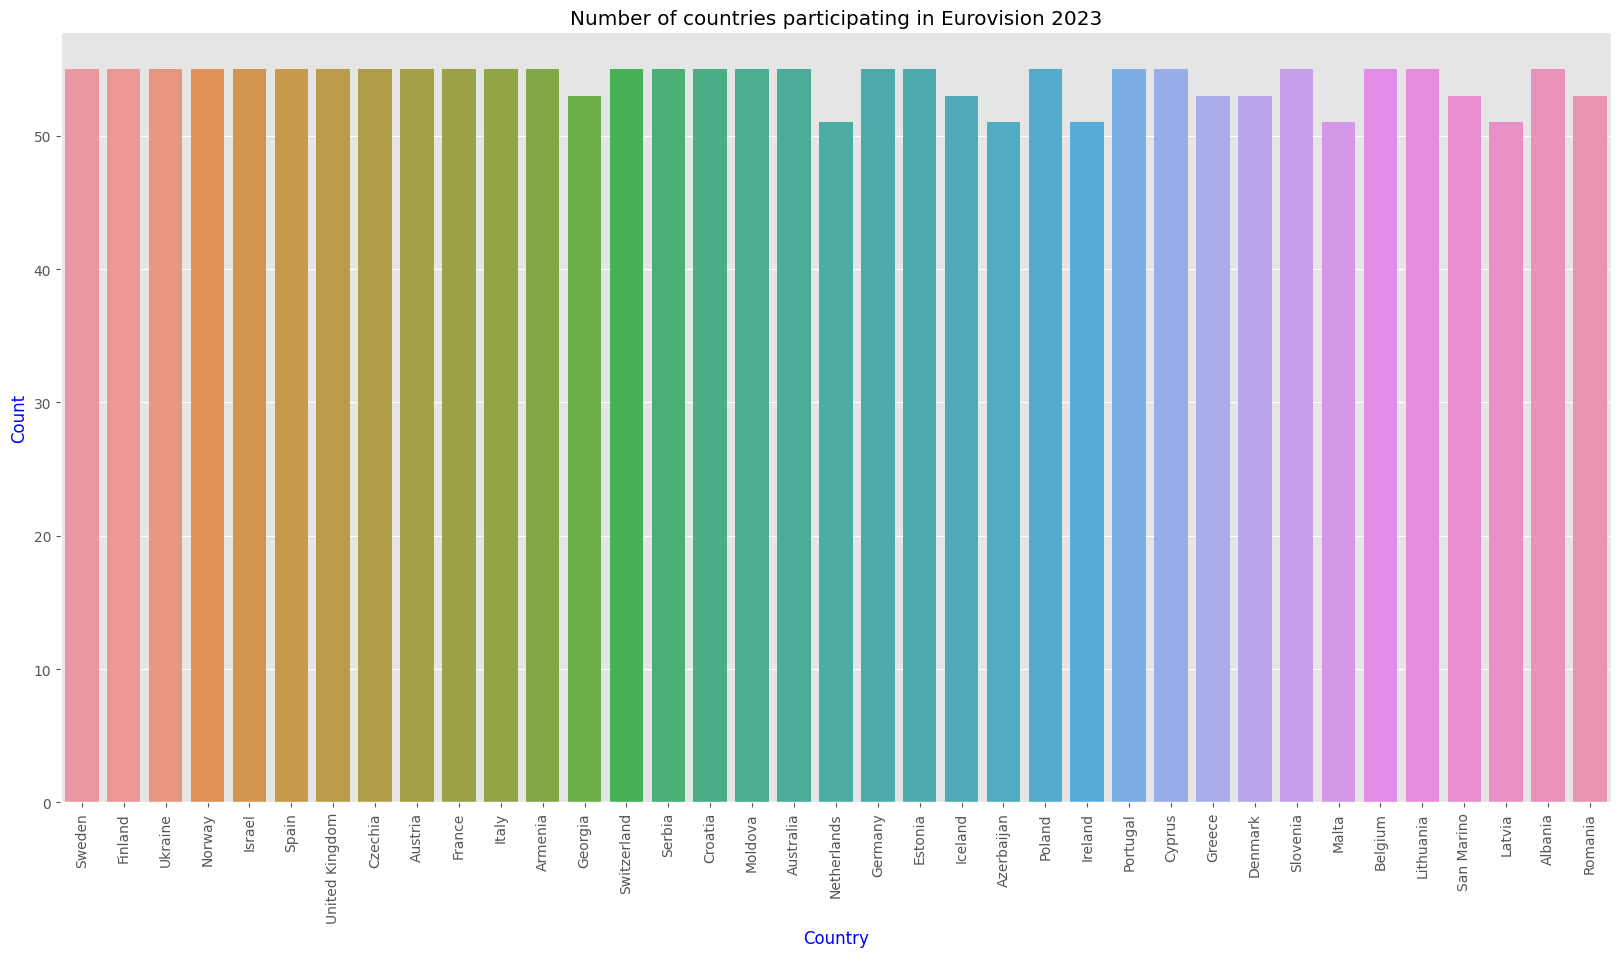

In [11]:
# Barplot of countries
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=eurovision_odds)
plt.title('Number of countries participating in Eurovision 2023')
plt.xlabel('Country', fontsize=12, c='blue')
plt.ylabel('Count', fontsize=12, c='blue')
plt.xticks(rotation=90)
plt.show();

In [12]:
# Number of countries participating in Eurovision 2023
eurovision_odds['country'].nunique()

37

In [12]:
# Country vs. song
country_song = eurovision_odds[['country', 'song']].value_counts()
country_song

country         song                                  
Albania         Albina & Familja Kelmendi - Duje          55
Germany         Lord Of The Lost - Blood & Glitter        55
Ukraine         Tvorchi - Heart of Steel                  55
Switzerland     Remo Forrer - Watergun                    55
Sweden          Loreen - Tattoo                           55
Spain           Blanca Paloma - Eaea                      55
Slovenia        Joker Out - Carpe Diem                    55
Serbia          Luke Black - Samo mi se spava             55
Portugal        Mimicat - Ai Coração                      55
Poland          Blanka - Solo                             55
Norway          Alessandra - Queen of Kings               55
Moldova         Pasha Parfeni - Soarele și Luna           55
Lithuania       Monika Linkytė - Stay                     55
Italy           Marco Mengoni - Due vite                  55
Armenia         Brunette - Future Lover                   55
Israel          Noa Kirel - Un

In [13]:
# convert country_song to dataframe
country_song = pd.DataFrame(country_song)
country_song

# reset index
country_song.reset_index(inplace=True)
country_song

,country,song,count
0,Albania,Albina & Familja Kelmendi - Duje,55
1,Germany,Lord Of The Lost - Blood & Glitter,55
2,Ukraine,Tvorchi - Heart of Steel,55
3,Switzerland,Remo Forrer - Watergun,55
4,Sweden,Loreen - Tattoo,55
5,Spain,Blanca Paloma - Eaea,55
6,Slovenia,Joker Out - Carpe Diem,55
7,Serbia,Luke Black - Samo mi se spava,55
8,Portugal,Mimicat - Ai Coração,55
9,Poland,Blanka - Solo,55


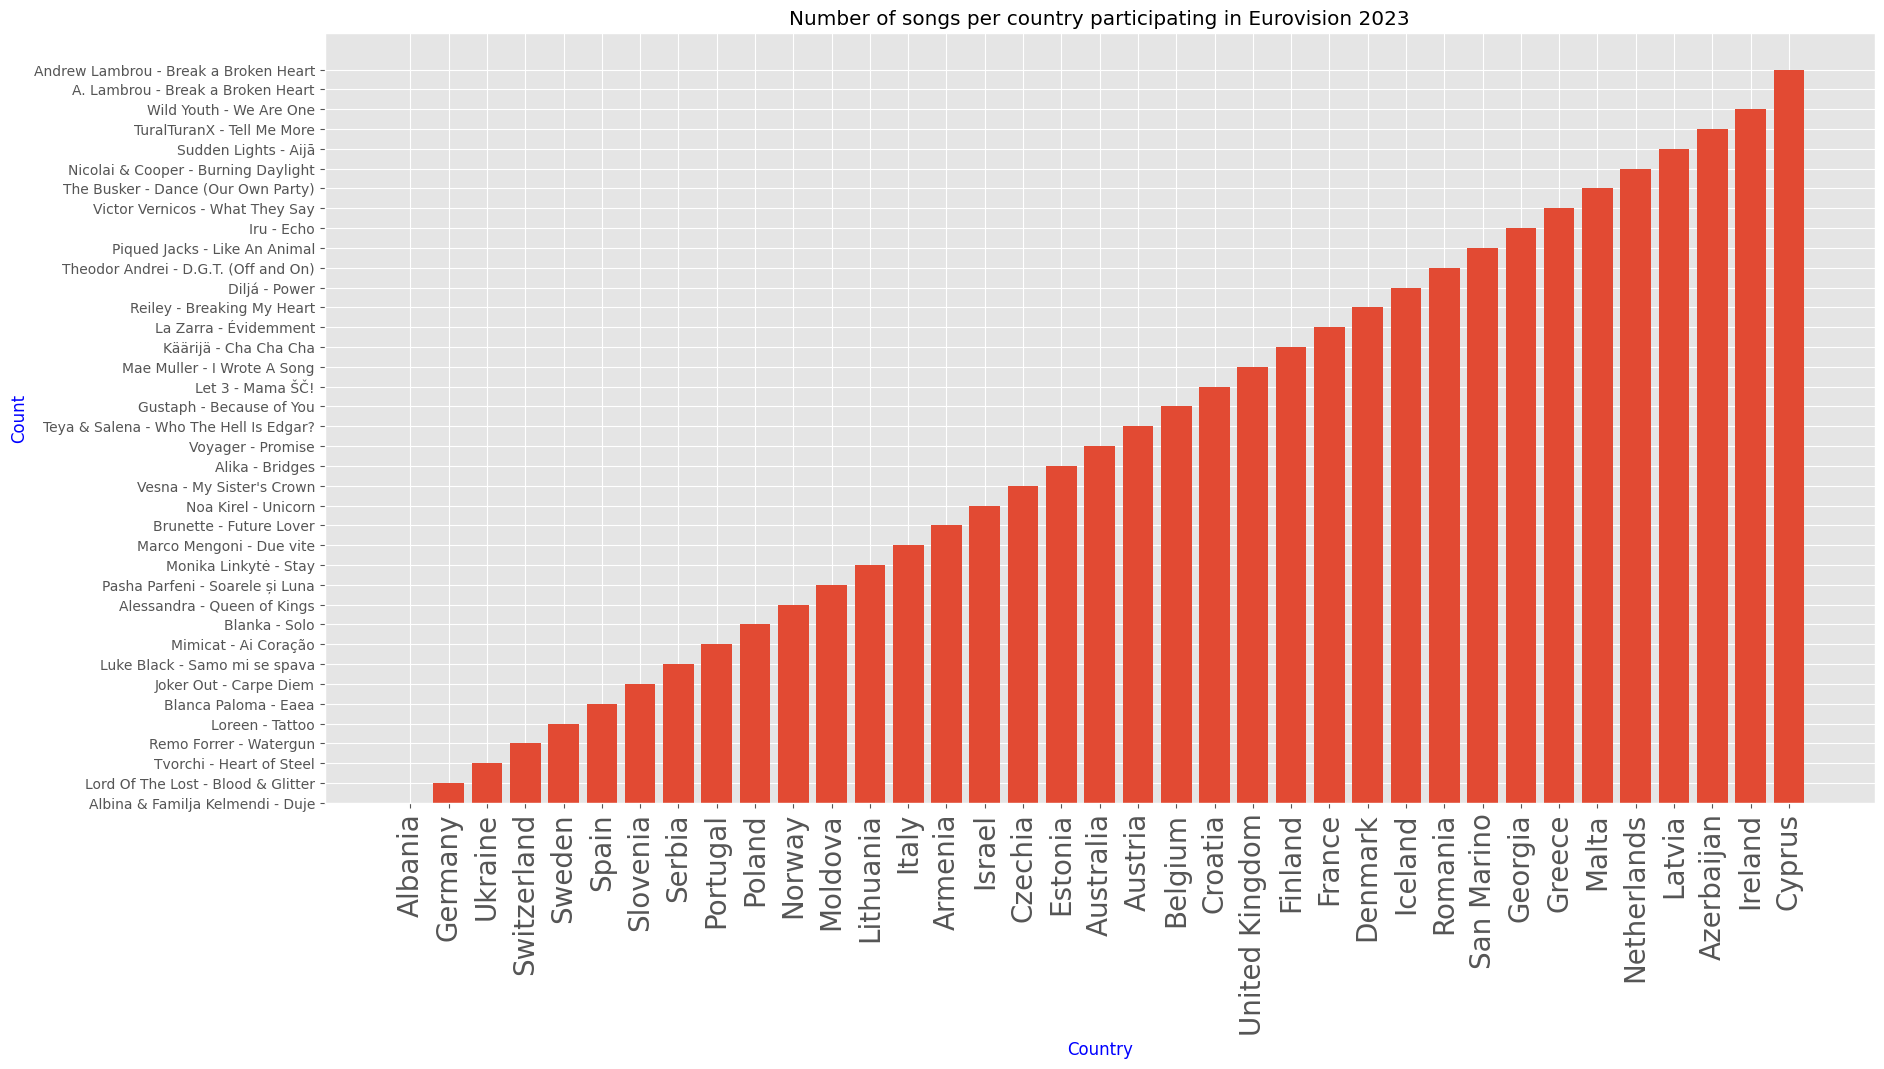

In [14]:
# Plot country vs. song
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.bar(country_song['country'], country_song['song'])
plt.title('Number of songs per country participating in Eurovision 2023')
plt.xlabel('Country', fontsize=12, c='blue')
plt.ylabel('Count', fontsize=12, c='blue')
plt.xticks(rotation=90, fontsize=20)
plt.show();

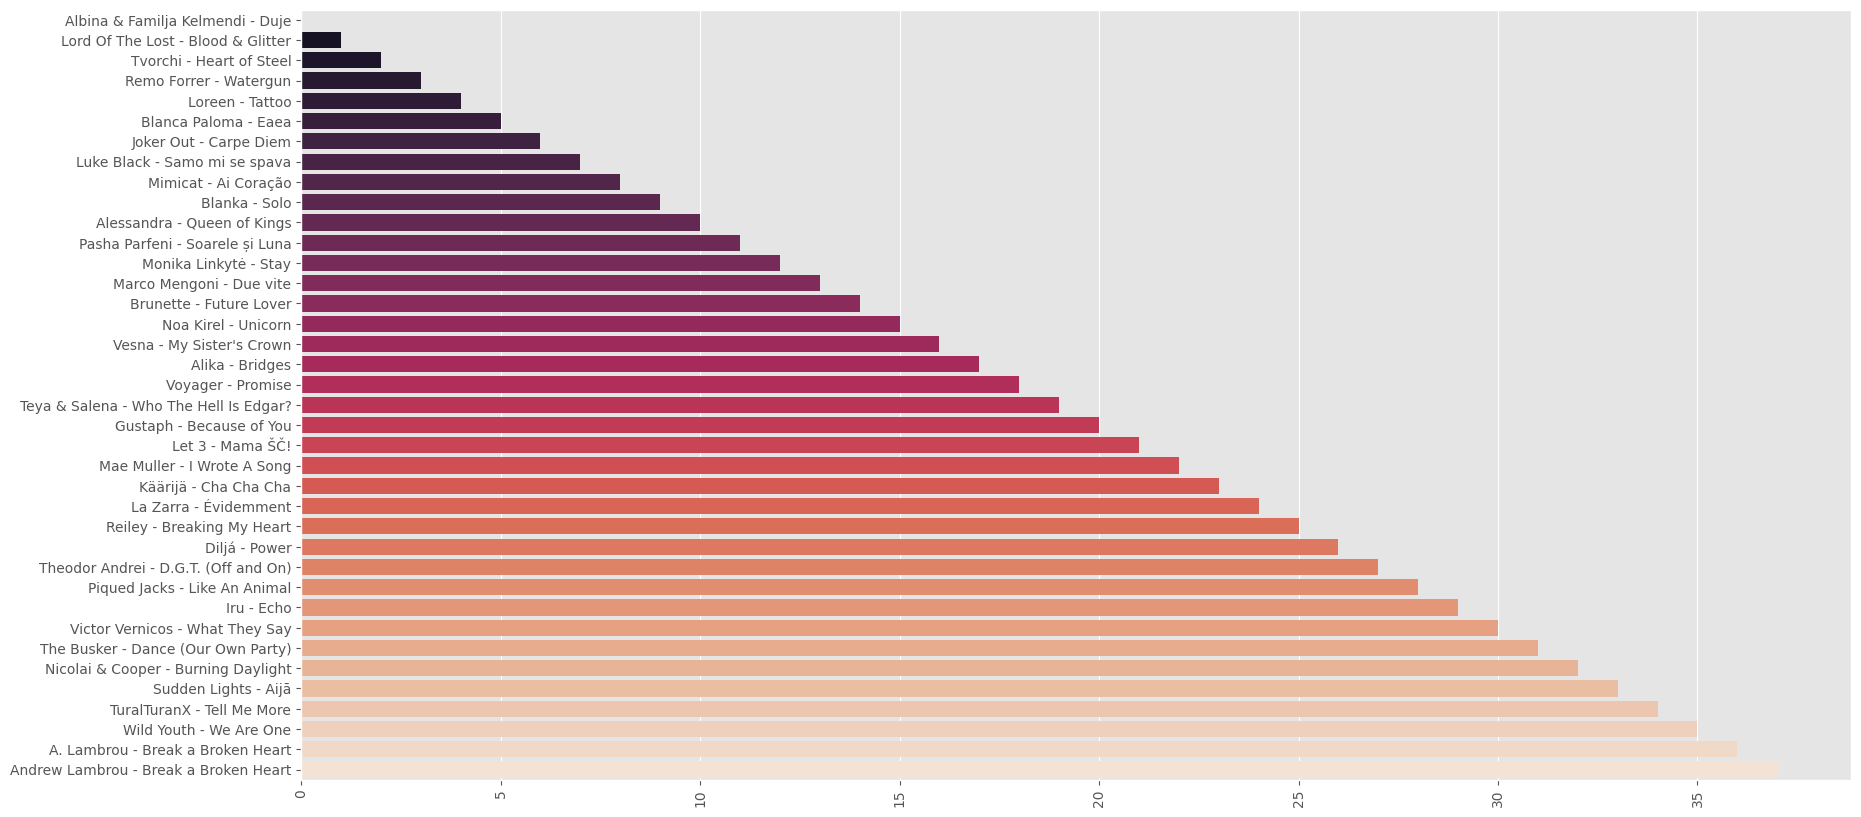

In [15]:
x = country_song['song']
plt.figure(figsize=(20, 10))
sns.barplot(x=x.index, y=x.values, palette='rocket')
plt.xticks(rotation=90);

In [16]:
# Barplot of song and winning chances
country_win = eurovision_odds[['song', 'winning chance']].sort_values(by='winning chance', ascending=False).tail(10).reset_index().rename(columns={'index': 'rank'})
country_win = country_win[['song', 'winning chance']]
country_win


,song,winning chance
0,Let 3 - Mama ŠČ!,1%
1,Voyager - Promise,1%
2,Nicolai & Cooper - Burning Daylight,1%
3,Lord Of The Lost - Blood & Glitter,1%
4,Let 3 - Mama ŠČ!,1%
5,Luke Black - Samo mi se spava,1%
6,Voyager - Promise,1%
7,Lord Of The Lost - Blood & Glitter,1%
8,Pasha Parfeni - Soarele și Luna,1%
9,Nicolai & Cooper - Burning Daylight,1%


In [17]:
eurovision_odds.columns

Index(['date', 'position', 'country', 'song', 'winning chance', 'BET365',
       'UNIBET', 'COOL BET', 'BETFAIR SPORT', 'SKY BET', ' BETSSON ',
       'LAD BROKES', 'COMEON', ' * SMARKETS', '888 SPORT', 'BOYLE SPORTS',
       'BET FRED', '10BET', 'BETWAY', ' WILLIAM  HILL', 'BETFAIR*  EXCHANGE ',
       'BWIN', 'BET STARS'],
      dtype='object')

In [18]:
# Create a new column for odds which is the mean of the odds columns
eurovision_odds['odds'] = eurovision_odds[['BET365',
       'UNIBET', 'COOL BET', 'BETFAIR SPORT', 'SKY BET', ' BETSSON ',
       'LAD BROKES', 'COMEON', ' * SMARKETS', '888 SPORT', 'BOYLE SPORTS',
       'BET FRED', '10BET', 'BETWAY', ' WILLIAM  HILL', 'BETFAIR*  EXCHANGE ',
       'BWIN', 'BET STARS']].mean(axis=1)
       
eurovision_odds.head()

,date,position,country,song,winning chance,BET365,UNIBET,COOL BET,BETFAIR SPORT,SKY BET,BETSSON,LAD BROKES,COMEON,* SMARKETS,888 SPORT,BOYLE SPORTS,BET FRED,10BET,BETWAY,WILLIAM HILL,BETFAIR* EXCHANGE,BWIN,BET STARS,odds
0,2023-03-20,1,Sweden,Loreen - Tattoo,40%,1.8,1.73,1.85,1.83,1.83,1.85,1.73,1.8,1.96,1.83,1.8,1.8,1.8,1.91,1.83,2.04,NaN,NaN,1.836875
1,2023-03-20,2,Finland,Käärijä - Cha Cha Cha,14%,5.5,4.50,4.75,6.00,6.00,4.50,5.50,4.0,6.40,5.00,4.5,5.5,4.0,4.00,5.50,7.00,NaN,NaN,5.165625
2,2023-03-20,3,Ukraine,Tvorchi - Heart of Steel,12%,6.5,7.00,6.00,6.00,6.00,7.00,6.00,6.0,7.00,5.50,5.0,6.0,6.0,7.50,5.00,8.00,NaN,NaN,6.281250
3,2023-03-20,4,Norway,Alessandra - Queen of Kings,5%,15.0,13.00,15.00,15.00,15.00,13.00,15.00,15.0,17.00,13.00,15.0,17.0,15.0,19.00,13.00,20.00,NaN,NaN,15.312500
4,2023-03-20,5,Israel,Noa Kirel - Unicorn,4%,21.0,21.00,21.00,23.00,26.00,25.00,21.00,17.0,16.00,21.00,17.0,23.0,17.0,23.00,13.00,20.00,NaN,NaN,20.312500


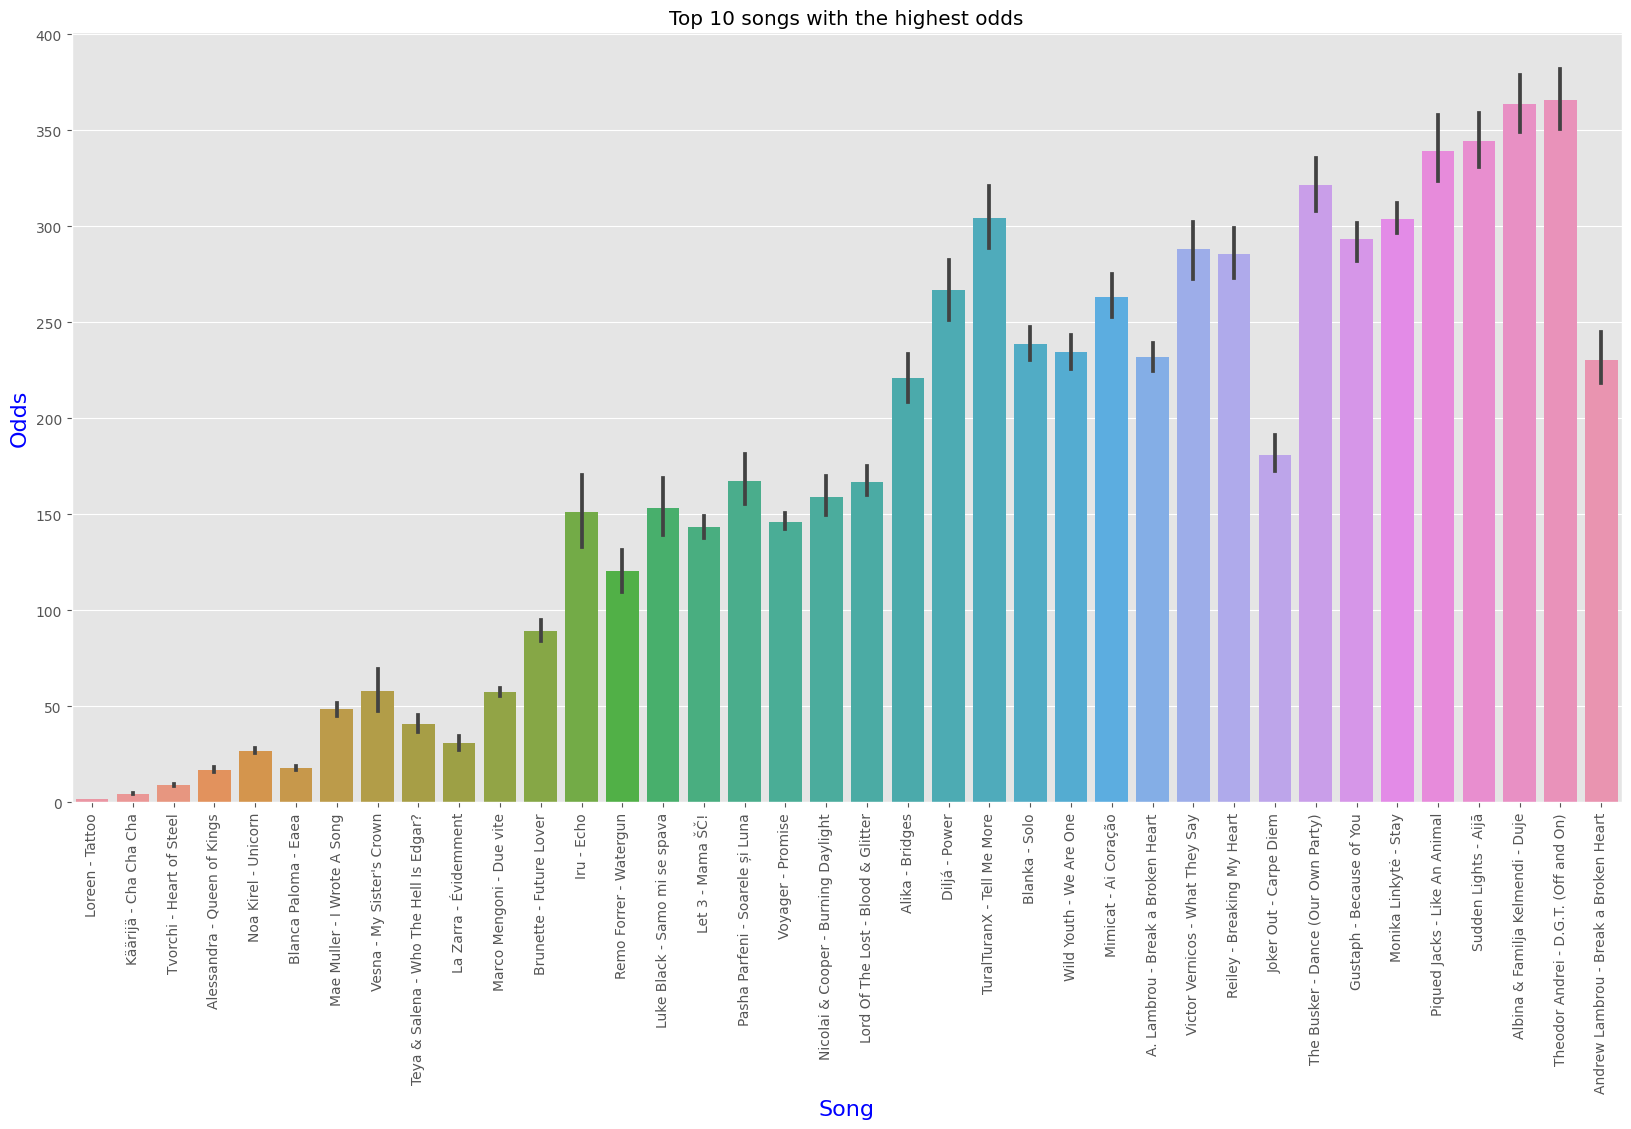

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
sns.barplot(x='song', y='odds', data=eurovision_odds)
plt.title('Top 10 songs with the highest odds')
plt.xlabel('Song', fontsize=16, c='blue')
plt.ylabel('Odds', fontsize=16, c='blue')
plt.xticks(rotation=90)
plt.show();

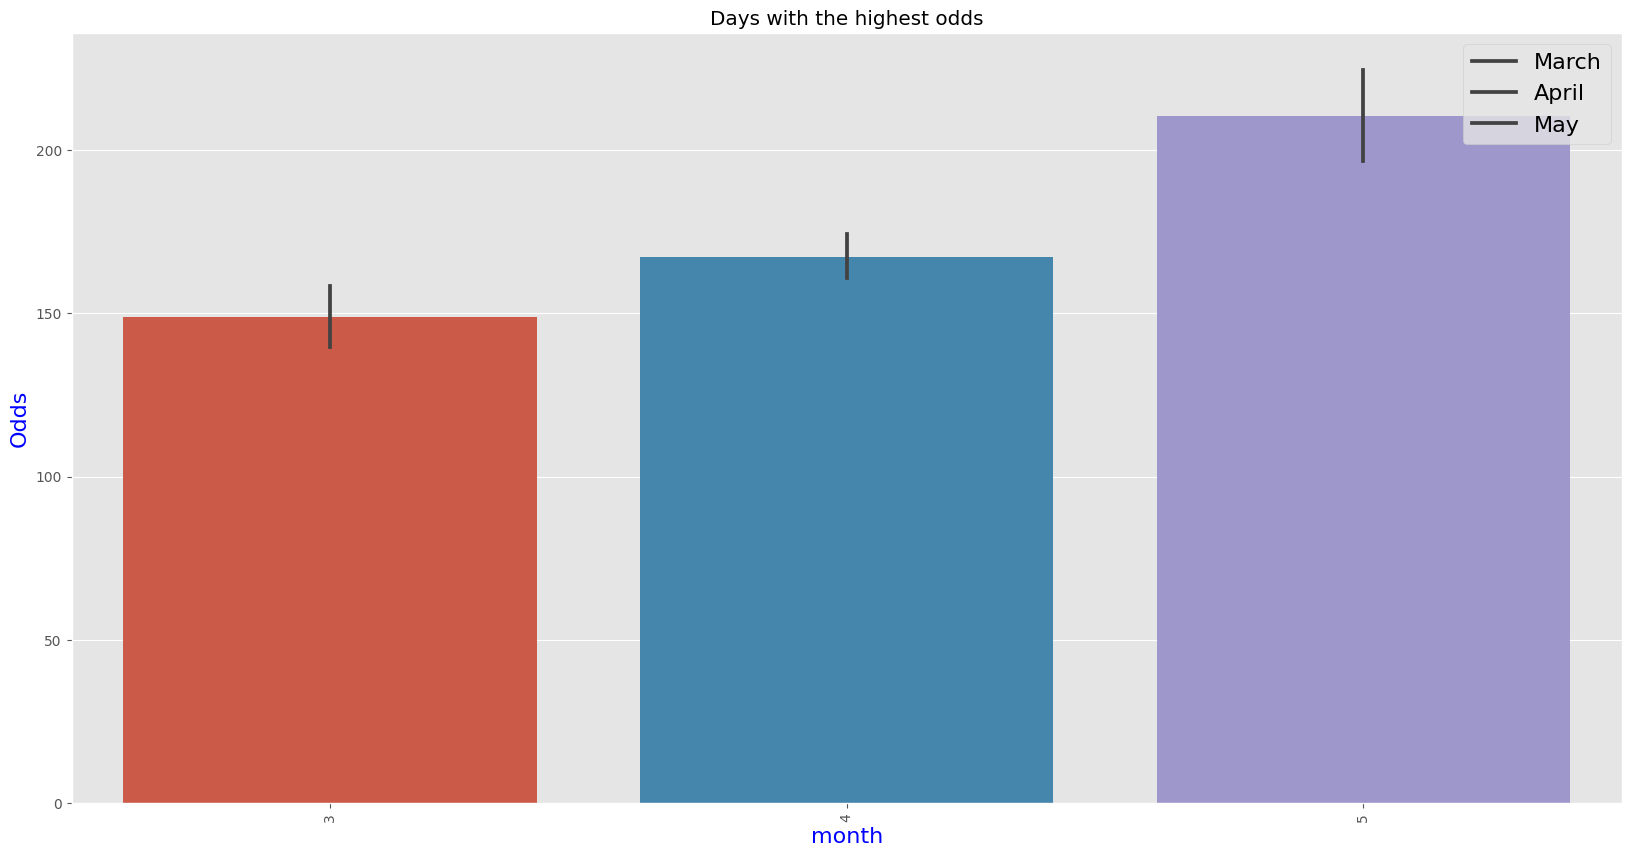

In [20]:
# Date vs. odds
eurovision_odds['date'] = pd.to_datetime(eurovision_odds['date'])
eurovision_odds['date'].head()

# Create a new column for month
eurovision_odds['month'] = eurovision_odds['date'].dt.month

# Barplot of month and odds
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
sns.barplot(x='month', y='odds', data=eurovision_odds)
plt.title('Days with the highest odds')
plt.xlabel('month', fontsize=16, c='blue')
plt.ylabel('Odds', fontsize=16, c='blue')
# add a legend NAME FOR EACH MONTH
labels = ['March', 'April', 'May']
plt.legend(labels, loc='upper right', fontsize=16)
# add label to each day in stead of numbers
plt.xticks(rotation=90)
plt.show();

In [21]:
# Correlation matrix
eurovision_odds.select_dtypes(include=['float64', 'int64']).corr()

,position,BET365,UNIBET,COOL BET,BETFAIR SPORT,SKY BET,BETSSON,LAD BROKES,COMEON,* SMARKETS,888 SPORT,BOYLE SPORTS,BET FRED,10BET,BETWAY,WILLIAM HILL,BETFAIR* EXCHANGE,BWIN,BET STARS,odds
position,1.000000,0.764913,0.858601,0.868477,0.889404,0.893302,0.880609,0.945534,0.897049,0.797377,0.818766,0.914184,0.892952,0.897049,0.950236,0.875341,0.910125,0.734335,0.884520,0.947390
BET365,0.764913,1.000000,0.738416,0.807102,0.819553,0.803966,0.886633,0.810933,0.807317,0.798515,0.691635,0.792227,0.828456,0.807317,0.780545,0.769045,0.794720,0.805158,0.830929,0.882735
UNIBET,0.858601,0.738416,1.000000,0.841454,0.805797,0.886571,0.850346,0.823977,0.887822,0.661453,0.694046,0.821271,0.738890,0.887822,0.831531,0.786818,0.806039,0.752539,0.801237,0.892983
COOL BET,0.868477,0.807102,0.841454,1.000000,0.841483,0.896337,0.912952,0.869903,0.865552,0.723870,0.747584,0.844628,0.786569,0.865552,0.883835,0.808507,0.906122,0.801014,0.867060,0.940394
BETFAIR SPORT,0.889404,0.819553,0.805797,0.841483,1.000000,0.868961,0.877980,0.898163,0.914163,0.795332,0.833320,0.899149,0.871819,0.914163,0.890794,0.885608,0.855472,0.707685,0.960701,0.938639
SKY BET,0.893302,0.803966,0.886571,0.896337,0.868961,1.000000,0.905714,0.867569,0.903115,0.706149,0.748073,0.864943,0.768490,0.903115,0.878115,0.807809,0.880009,0.790580,0.857802,0.942612
BETSSON,0.880609,0.886633,0.850346,0.912952,0.877980,0.905714,1.000000,0.883385,0.905106,0.776897,0.782522,0.871759,0.821791,0.905106,0.888544,0.834088,0.868330,0.824189,0.883337,0.953768
LAD BROKES,0.945534,0.810933,0.823977,0.869903,0.898163,0.867569,0.883385,1.000000,0.904857,0.822145,0.822039,0.898603,0.900434,0.904857,0.932309,0.865721,0.904298,0.719448,0.884790,0.949278
COMEON,0.897049,0.807317,0.887822,0.865552,0.914163,0.903115,0.905106,0.904857,1.000000,0.750574,0.781375,0.896399,0.832330,1.000000,0.896933,0.852455,0.860919,0.712820,0.884228,0.948439
* SMARKETS,0.797377,0.798515,0.661453,0.723870,0.795332,0.706149,0.776897,0.822145,0.750574,1.000000,0.744297,0.781218,0.857169,0.750574,0.795203,0.748038,0.769785,0.619882,0.823171,0.832241


* *Heavy correlation!

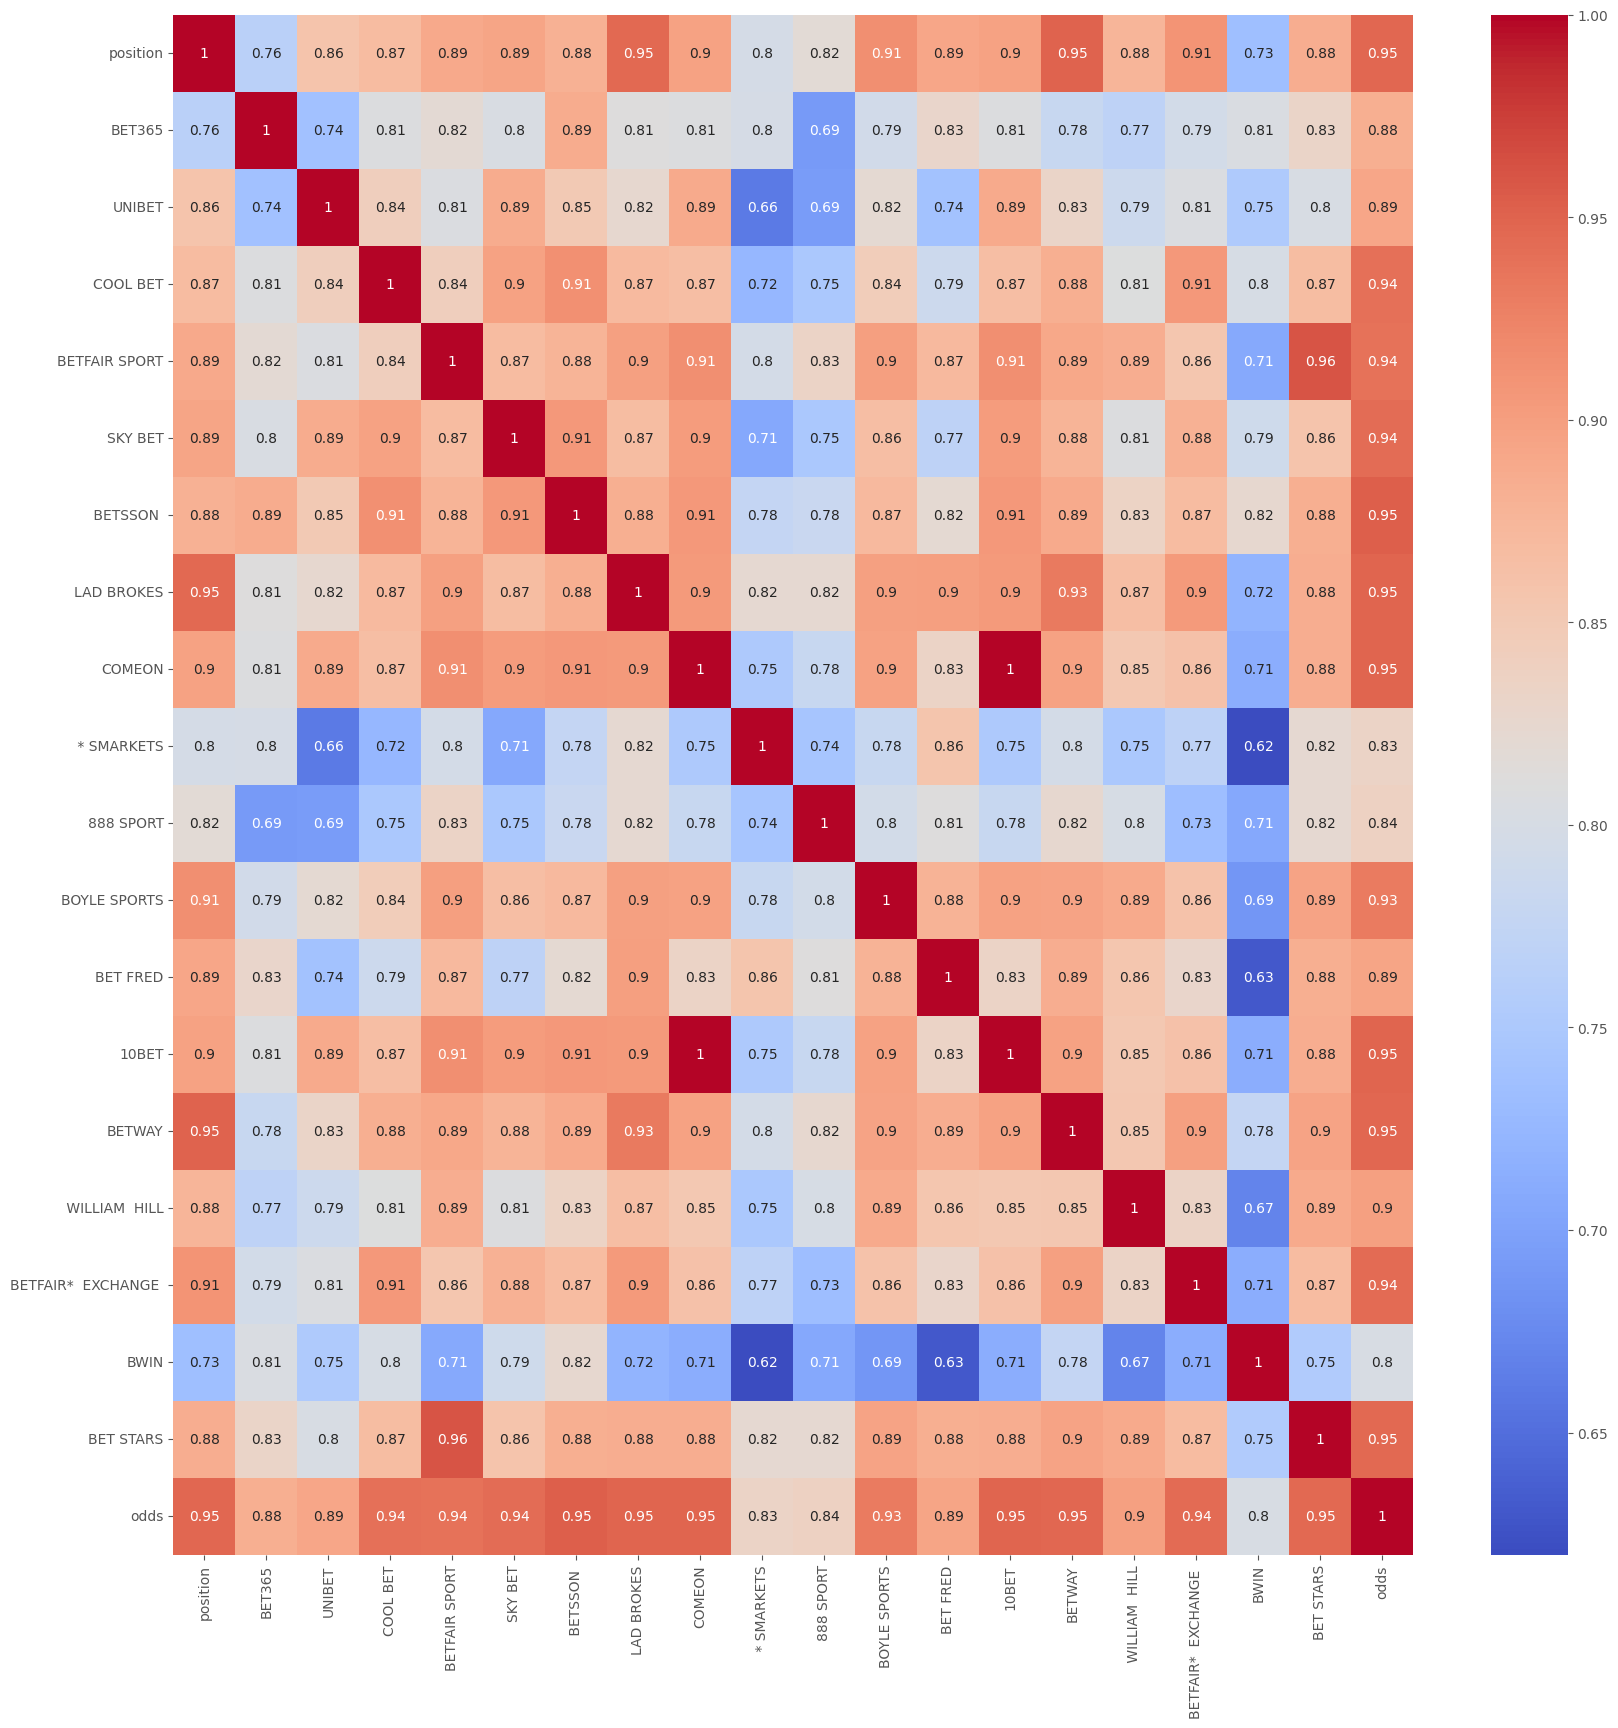

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(eurovision_odds.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm');

In [13]:
# Prepare data for modelling

# convert datetime to object
# eurovision_odds['date'] = eurovision_odds['date'].astype('object')

eurovision_odds.fillna(0, inplace=True)

# Check for missing values
num_missing = eurovision_odds.isnull().sum().sum()
print(f"The number of missing values in the dataframe is: {num_missing}")

# Check for duplicates
num_duplicates = eurovision_odds.duplicated().sum()
print(f"The number of duplicates in the dataframe is: {num_duplicates}")

The number of missing values in the dataframe is: 0
The number of duplicates in the dataframe is: 0


In [14]:
eurovision_odds.columns

Index(['date', 'position', 'country', 'song', 'winning chance', 'BET365',
       'UNIBET', 'COOL BET', 'BETFAIR SPORT', 'SKY BET', ' BETSSON ',
       'LAD BROKES', 'COMEON', ' * SMARKETS', '888 SPORT', 'BOYLE SPORTS',
       'BET FRED', '10BET', 'BETWAY', ' WILLIAM  HILL', 'BETFAIR*  EXCHANGE ',
       'BWIN', 'BET STARS'],
      dtype='object')

 Predictions [35.90794924 18.6724478   9.826846   10.87273885 32.58413404 14.06033677
 12.86155284 33.97078709 26.24984779 11.55218563 23.19069855 33.18242023
 36.33230198 29.76147134  9.91932624 12.34313025  9.85596753 12.35704577
  9.66983122 33.32379503 10.44895341 31.79039745 10.03376602 11.31792336
 31.37981481 19.85675552 36.94382502  9.71963593 11.16447365 19.77446533
 28.47374946 15.0254073  11.94775196 31.31093129 33.50362055  9.90679279
 15.31909316  9.77906608 28.68384426 30.64453549 11.97875154 13.45780912
 22.24321704 32.25822841 10.82132382 16.62187867 18.06921782 23.51574604
 31.27915133 27.50321506  9.80927592 35.0638346   9.79193055 24.09608536
 25.34998167 24.58189915  9.66180472 14.217648   31.30012851 18.44389789
  9.57760233  9.63761742 20.04088847 13.38036849 15.71898658  9.81966659
 22.2468528  10.34569772  9.79922358 12.13824835 23.57615293 13.4177165
 30.80130022 22.16966081 11.04390158 28.87021373 35.33263637 10.23514034
 29.89909838 11.65661592 30.93509261 32

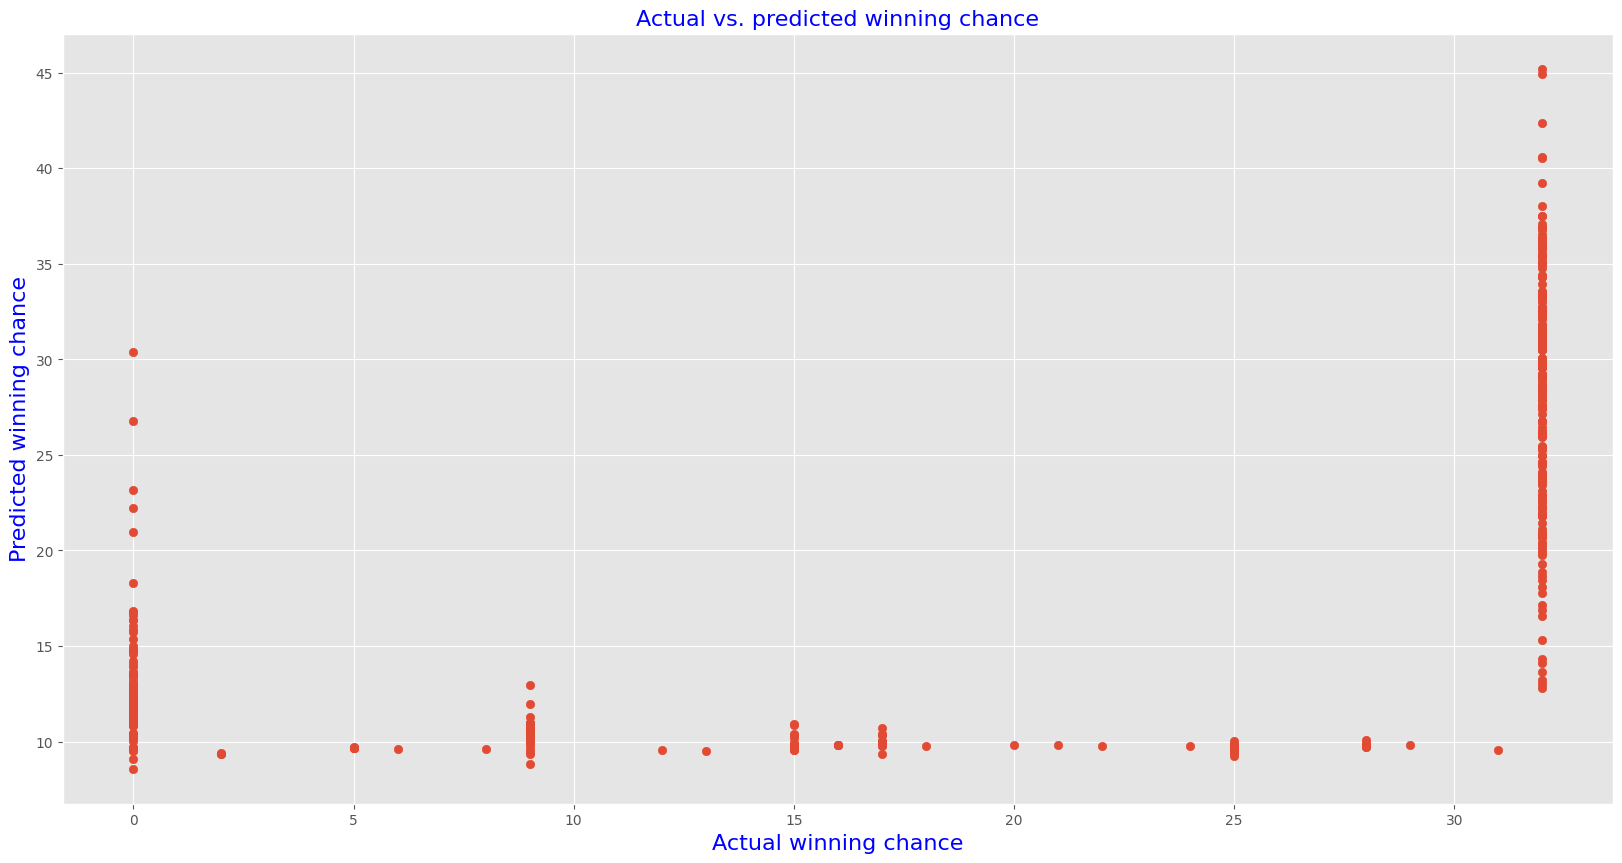

In [20]:
# Convert date column to numerical representation
#eurovision_odds['date'] = pd.to_datetime(eurovision_odds['date'])

# Select features and target
X = eurovision_odds[['BET365', 'position',
       'UNIBET', 'COOL BET', 'BETFAIR SPORT', 'SKY BET', ' BETSSON ',
       'LAD BROKES', 'COMEON', ' * SMARKETS', '888 SPORT', 'BOYLE SPORTS',
       'BET FRED', '10BET', 'BETWAY', ' WILLIAM  HILL', 'BETFAIR*  EXCHANGE ',
       'BWIN', 'BET STARS']]
y = eurovision_odds['winning chance']

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X['song'] = le.fit_transform(X['song'])
#X['country'] = le.fit_transform(X['country'])
y = le.fit_transform(y)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)
print(" Predictions {}".format(lr_y_pred))

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score: {}".format(r2_score(y_test, lr_y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test, lr_y_pred)))
print("Root mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, lr_y_pred))))

# Plot the predictions
plt.figure(figsize=(20, 10))
plt.scatter(y_test, lr_y_pred)
plt.xlabel('Actual winning chance', fontsize=16, c='blue')
plt.ylabel('Predicted winning chance', fontsize=16, c='blue')
plt.title('Actual vs. predicted winning chance', fontsize=16, c='blue')
plt.show()

 Predictions [34.96197423 18.1351056   9.36361937 12.00254002 32.42127441 14.11469157
 13.00736672 33.52037798 26.87096147 11.97804096 23.06503918 34.28938753
 35.07166256 29.90813974  9.75665927 12.56373577 10.04600871 12.05801058
  9.09897311 33.11066064 10.83137972 32.21774478  9.70979689 11.63642063
 31.18639633 20.69829662 37.29029101  9.43717005 11.81799113 20.52691647
 28.36121275 14.56820092 12.47387194 31.91896799 33.98837879 10.06836187
 15.97120398  9.00706561 27.75484867 30.74009413 12.60700546 13.49610585
 23.1271488  32.3039025  11.55664166 16.55442269 18.59971697 25.22967651
 31.29667135 28.22265484 10.03024747 35.02158108  9.01512054 24.43447468
 25.72515282 24.83361077  9.83749591 14.45471988 31.44473686 19.18612619
  9.55127966  9.90550721 19.94201385 13.7459594  15.52458217  9.05335002
 22.46250359 10.5317248   9.01671037 12.40762183 24.27047148 13.64808512
 30.9235155  22.02772682 11.8671933  28.94407388 35.13674409 10.81296466
 29.86426003 12.13734862 31.16913816 3

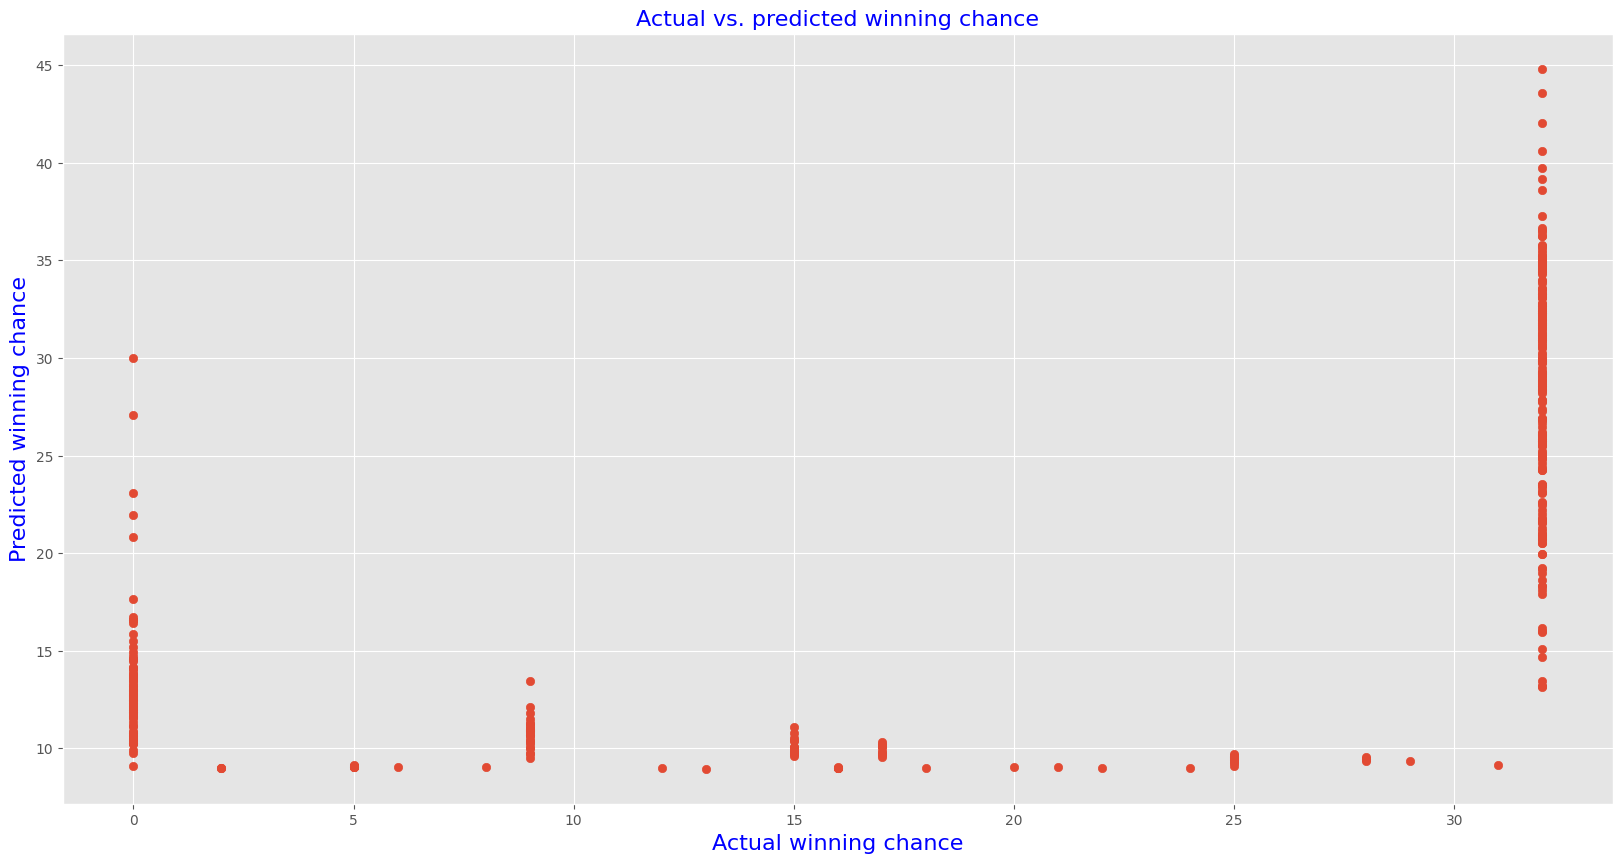

In [21]:
# Instantiate the model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lasso = Lasso()

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso.predict(X_test)
print(" Predictions {}".format(lasso_y_pred))

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score: {}".format(r2_score(y_test, lasso_y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test, lasso_y_pred)))
print("Root mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, lasso_y_pred))))

# Plot the predictions
plt.figure(figsize=(20, 10))
plt.scatter(y_test, lasso_y_pred)
plt.xlabel('Actual winning chance', fontsize=16, c='blue')
plt.ylabel('Predicted winning chance', fontsize=16, c='blue')
plt.title('Actual vs. predicted winning chance', fontsize=16, c='blue')
plt.show()